# Customer Churn Prediction

Customer churn, or customer attrition, refers to when a customer ceases their relationship
with a company or service provider. In today's highly competitive business environment,
retaining customers is a critical factor for long-term success. Predicting customer churn can
help organizations take proactive steps to retain customers, thus minimizing revenue loss.
This project aims to build a machine learning model that can predict whether a customer will
churn based on their demographic, account, and service-related data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_excel('churn_data.xlsx')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  EDA (Exploratory Data Analysis) & Summary Statistics

In [5]:
print("Dataset Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes)


Dataset Shape: (7043, 21)

Column Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
df = df[df['TotalCharges'].notnull()]
df.reset_index(drop=True, inplace=True)


In [8]:
print("Missing after cleanup:")
print(df.isnull().sum())


Missing after cleanup:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


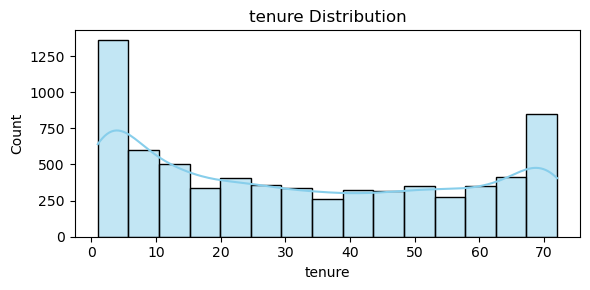

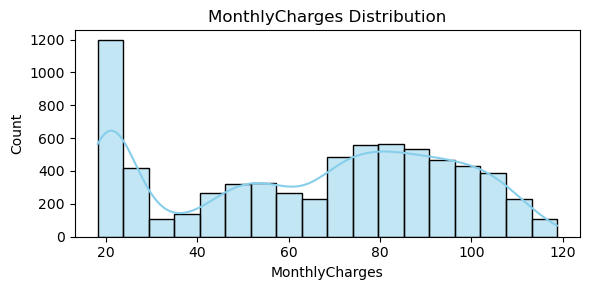

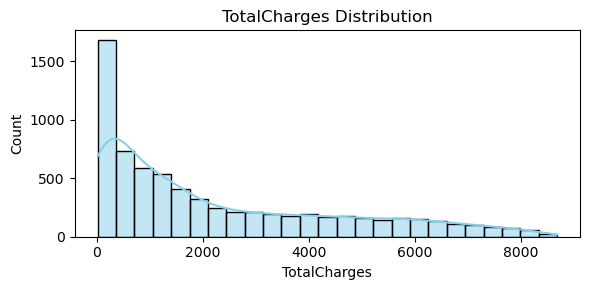

In [9]:
# Numerical Feature Distributions
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()


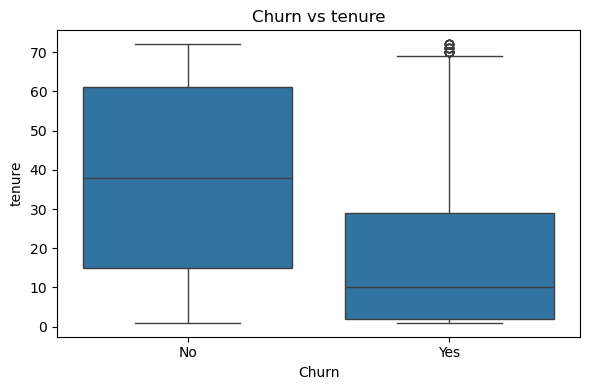

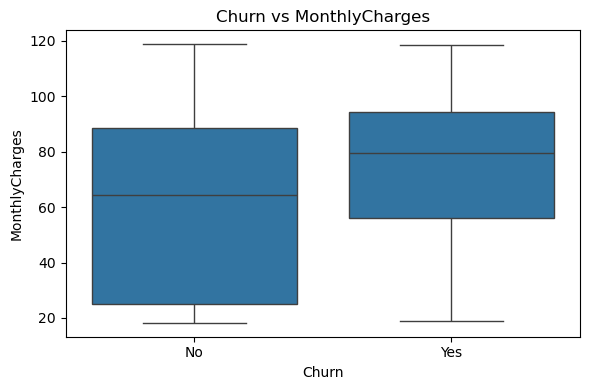

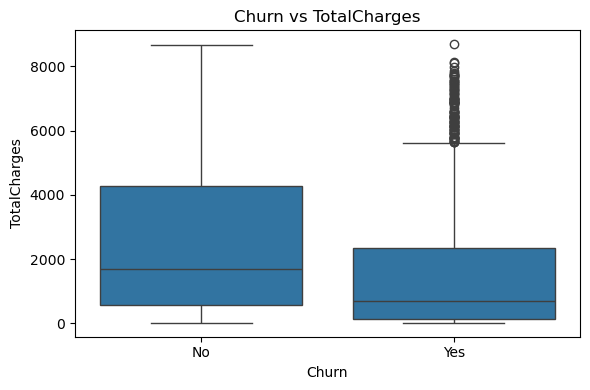

In [10]:
# Churn vs Numerical Features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Churn vs {col}')
    plt.tight_layout()
    plt.show()


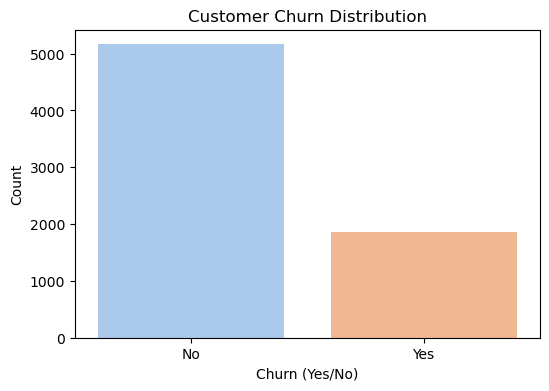

Churn Rate:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [11]:
#Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Churn', dodge=False, palette='pastel')

plt.title('Customer Churn Distribution')
plt.ylabel('Count')
plt.xlabel('Churn (Yes/No)')
plt.show()

# Churn percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)


In [12]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [13]:
# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# One-hot encode remaining categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [14]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [15]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#  Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [18]:
# Initialize and fit the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

In [20]:
# Evaluation metrics
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.8045486851457001
Precision: 0.649546827794562
Recall: 0.5748663101604278
F1 Score: 0.6099290780141844


In [21]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



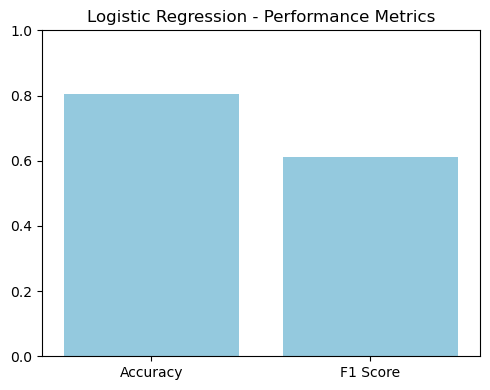

In [63]:
# Accuracy and F1-score Bar Plot
log_acc = accuracy_score(y_test, y_pred_lr)
log_f1 = f1_score(y_test, y_pred_lr)

plt.figure(figsize=(5, 4))

sns.barplot(x=['Accuracy', 'F1 Score'], y=[log_acc, log_f1], color='skyblue')

plt.ylim(0, 1)
plt.title("Logistic Regression - Performance Metrics")
plt.tight_layout()
plt.show()


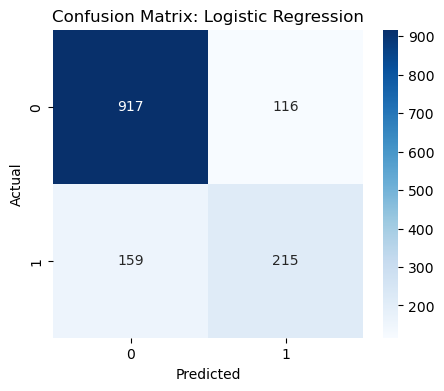

In [22]:
# Confusion Matrix


cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[916 117]
 [183 191]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<function matplotlib.pyplot.show(close=None, block=None)>

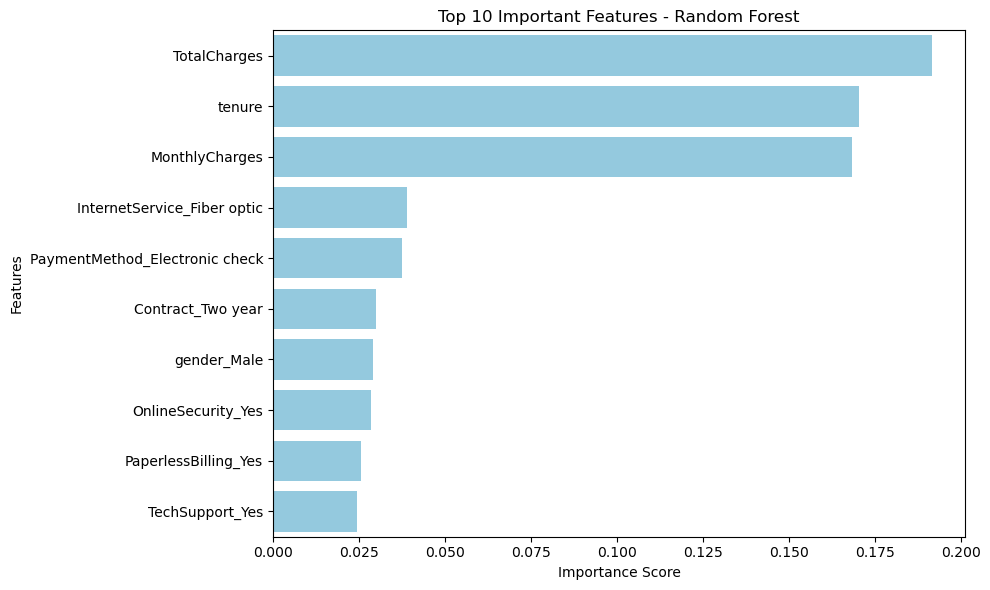

In [65]:
importances = rf.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], hue=None, legend=False, color='skyblue')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show


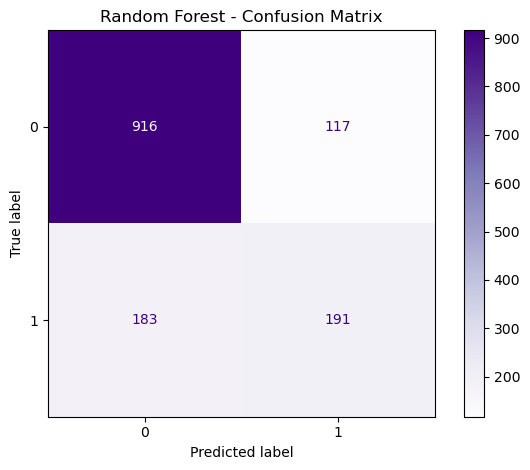

In [92]:
# Confusion Matrix - Heatmap
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()


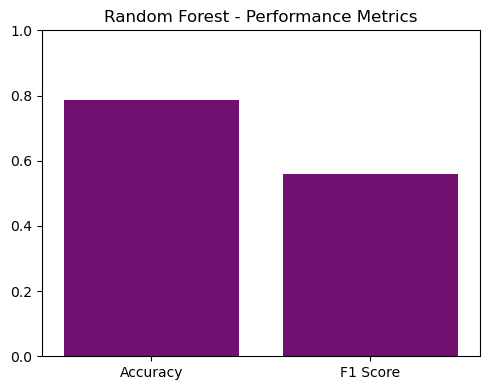

In [93]:
# Accuracy and F1-score Bar Plot
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.barplot(x=['Accuracy', 'F1 Score'], y=[rf_acc, rf_f1], color='Purple')
plt.ylim(0, 1)
plt.title("Random Forest - Performance Metrics")
plt.tight_layout()
plt.show()


# XGBoost Classifier

In [46]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00a 0:00:01


In [70]:
from xgboost import XGBClassifier


In [80]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Print scores
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.7782515991471215
Precision: 0.5890804597701149
Recall: 0.5481283422459893
F1 Score: 0.5678670360110804


In [82]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



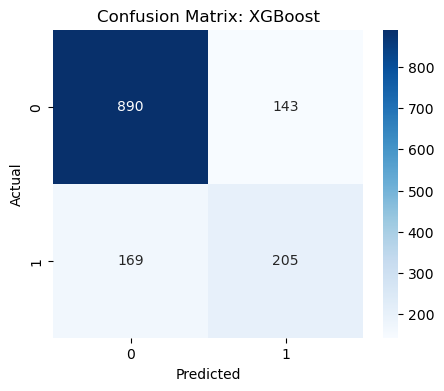

In [83]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


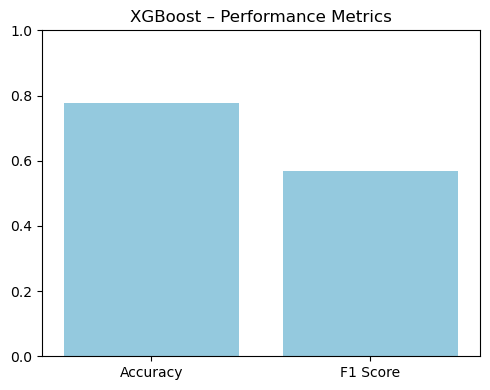

In [84]:
#Accuracy and F1-Score Plot
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.barplot(x=['Accuracy', 'F1 Score'], y=[xgb_acc, xgb_f1], color='skyblue')
plt.ylim(0,1)
plt.title("XGBoost – Performance Metrics")
plt.tight_layout()
plt.show()


# Model Comparison

In [87]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [log_acc, rf_acc, xgb_acc]
f1_scores = [log_f1, rf_f1, xgb_f1]


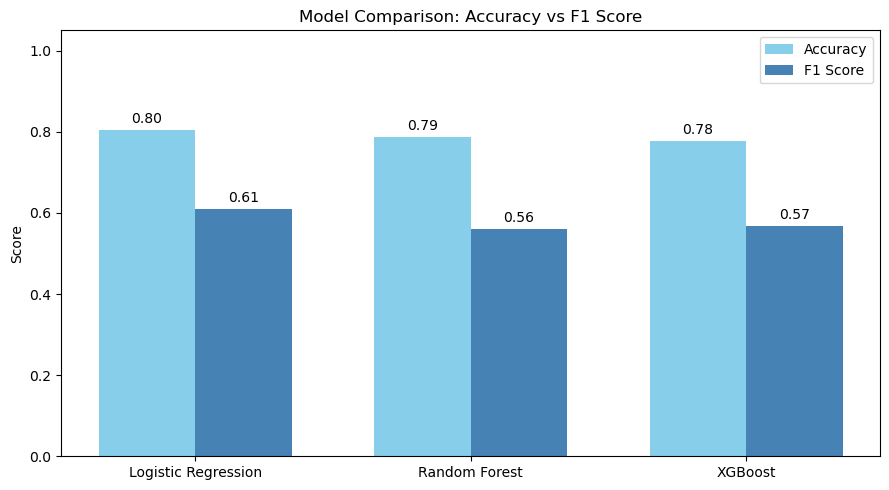

In [88]:
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(9, 5))
bars1 = plt.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='steelblue')

# Add value labels
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.2f}", ha='center', va='bottom')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.legend()
plt.tight_layout()
plt.show()

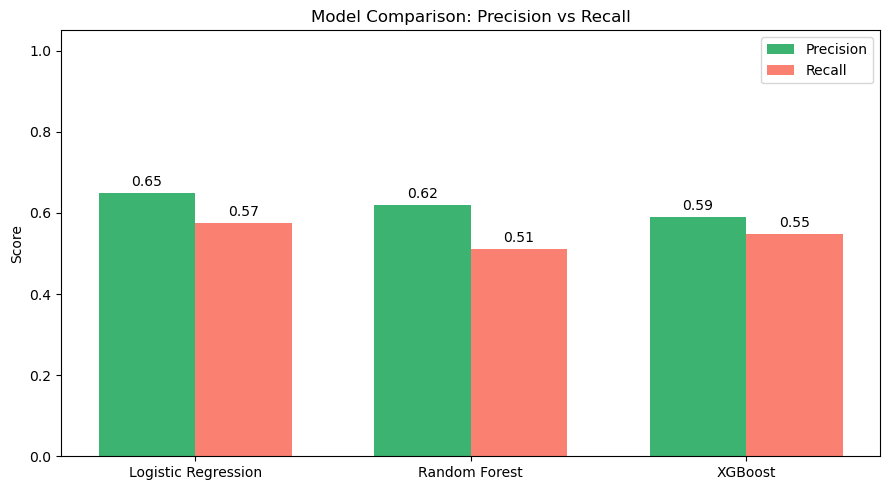

In [97]:
# Precision & Recall for all models
log_prec = precision_score(y_test, y_pred_lr)
log_rec = recall_score(y_test, y_pred_lr)

rf_prec = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)

xgb_prec = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

# Prepare data for bar plot
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
precision_scores = [log_prec, rf_prec, xgb_prec]
recall_scores = [log_rec, rf_rec, xgb_rec]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(9, 5))
bar1 = plt.bar(x - width/2, precision_scores, width, label='Precision', color='mediumseagreen')
bar2 = plt.bar(x + width/2, recall_scores, width, label='Recall', color='salmon')

# Add value labels
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Comparison: Precision vs Recall')
plt.legend()
plt.tight_layout()
plt.show()

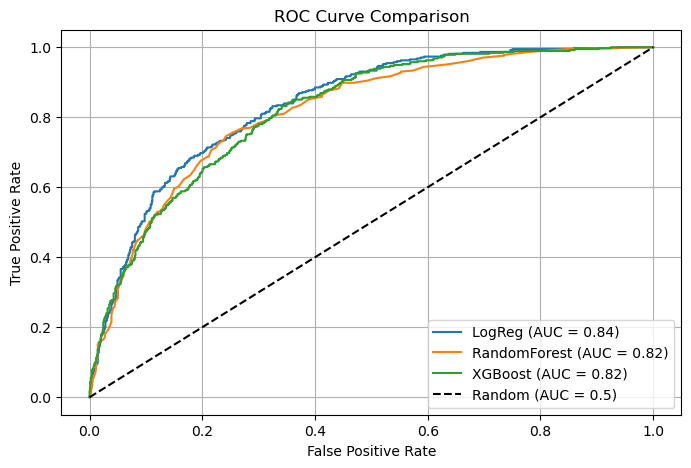

In [101]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()


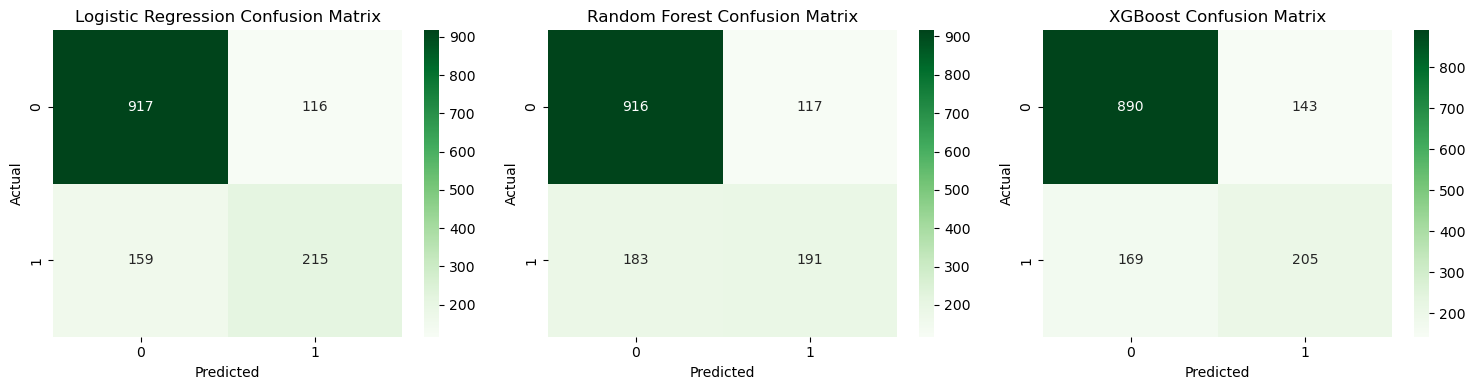

In [103]:
models = {'Logistic Regression': y_pred_lr, 'Random Forest': y_pred, 'XGBoost': y_pred_xgb}
plt.figure(figsize=(15, 4))

for i, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## Final Conclusion

Based on the evaluation metrics:

- **Logistic Regression** performed the best overall with:
  - **Accuracy: 0.80**
  - **F1-Score: 0.61**
  - **AUC: 0.84**

- **Random Forest** and **XGBoost** showed slightly lower F1-Scores and AUCs, which may indicate some overfitting or less generalization on this dataset.

### Business Insight
For churn prediction, Logistic Regression provides the most balanced and interpretable performance. It can be deployed with confidence for early churn detection.

---
